<div class="alert alert-success">
<h1>Clustering Lab</h1>
<h2>ASI Lab - 18/05/2017</h2>
</div>

<h2>1. Aims</h2>
<p>
<ul>
<li>To implement K-means and use it to cluster some data.
</ul>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy
import scipy.io as sio
import time as time
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 20.0)

In [2]:
data = sio.loadmat('./Lab4/files_lab_clustering_2017-05-10_15-04-57_212/kmeansdata.mat')["X"]

<h2>2. K-means</h2>

<div class="alert alert-danger">
TODO: describe kmeans
</div>

In [3]:
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1)-np.array(p2))

In [4]:
def find_closest_centroid(datapoint, centroids):
    # find the index of the closest centroid of the given data point.
    distances = [euclidean_distance(datapoint, _) for _ in centroids]
    return np.argmin(distances)

In [5]:
def randomize_centroids(data, k):
    centroids = data
    np.random.shuffle(centroids)
    return centroids[:k]

In [31]:
MAX_ITERATIONS = 500

def check_converge(centroids, old_centroids, num_iterations, threshold=0):
    # if it reaches an iteration budget
    if num_iterations > MAX_ITERATIONS:
        return True
    # check if the centroids don't move (or very slightly)
    dist = [euclidean_distance(curr, old) for curr, old in zip(centroids, old_centroids)]
    if all(dist[x]<=threshold for x in range(len(dist))):
        return True
    return False

In [32]:
def update_centroids(centroids, cluster):
    for i, c in enumerate(cluster):
        centroids[i] = sum(c)/len(c)
    return centroids

In [43]:
# data : set of data points
# k : number of clusters
# centroids: initial list of centroids
def kmeans(data, k=2, centroids=None):
    
    # randomize the centroids if they are not given
    if not centroids:
        centroids = randomize_centroids(data, k)

    old_centroids = centroids[:]

    iterations = 0
    while True:
        iterations += 1

        # init empty clusters
        clusters = [[] for i in range(k)]

        # assign each data point to the closest centroid
        for point in data:
            # find the closest center of each data point
            centroid_idx = find_closest_centroid(point, centroids)
            
            # assign datapoint to the closest cluster
            clusters[centroid_idx].append(point)
        
        # keep the current position of centroids before changing them
        old_centroids = centroids[:]
        
        # update centroids
        centroids = update_centroids(clusters, clusters)
        
        # if the stop criteria are met, stop the algorithm
        if check_converge(centroids, old_centroids, iterations):
            break
    return np.array(centroids), iterations

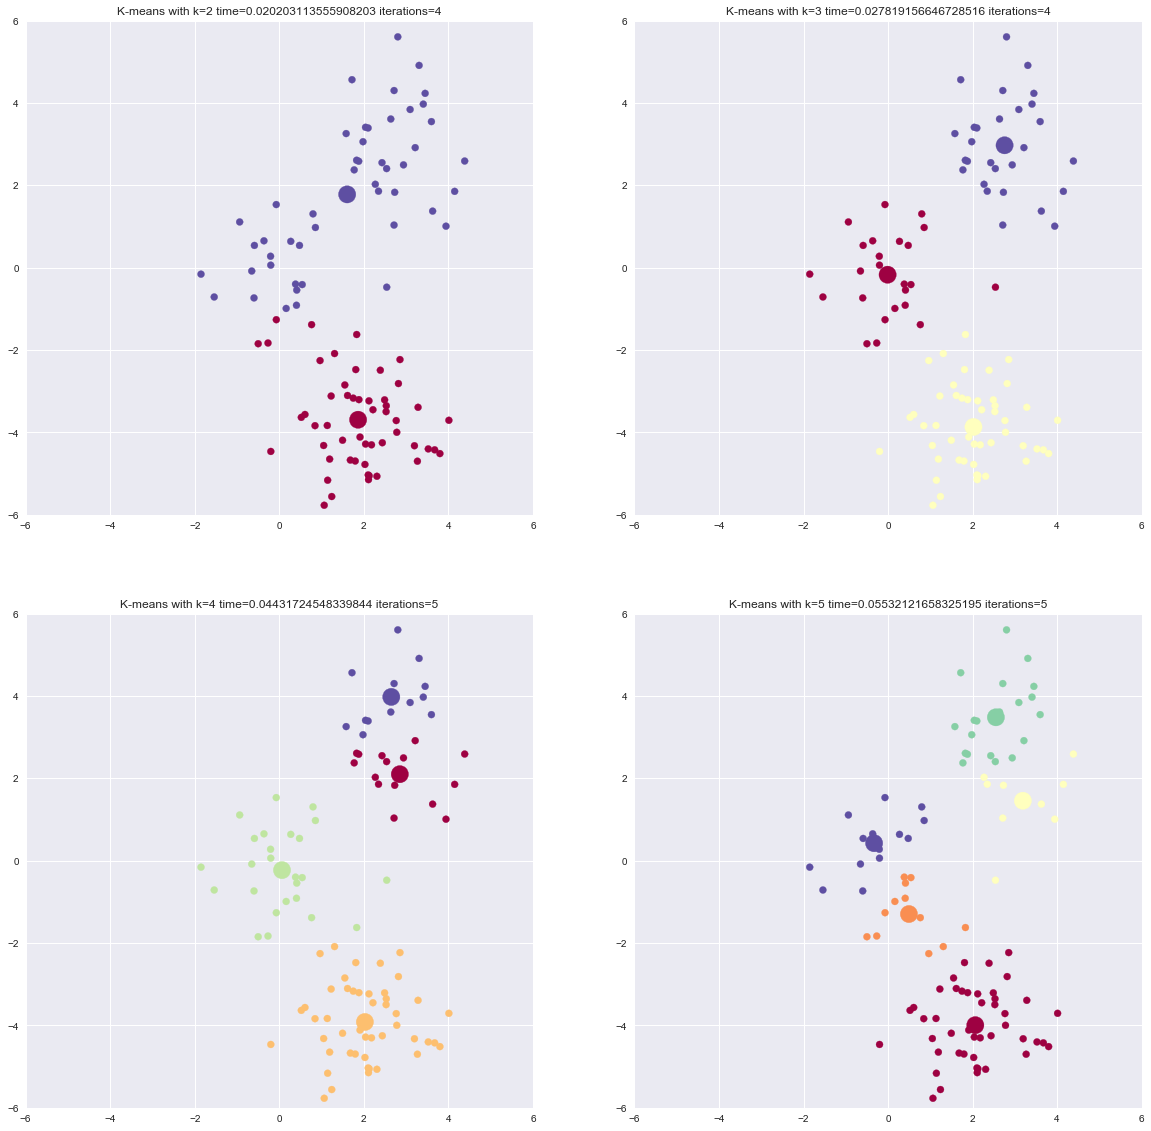

In [52]:
fig, axes = plt.subplots(2,2)
for k, ax in zip([2,3,4,5], axes.flatten()):
    t0 = time.time()
    centroids, iterations = kmeans(data, k=k)
    t1 = time.time()
    labels = [find_closest_centroid(x, centroids) for x in data]

    #PLOTTING
    #plt.figure(figsize=(10,10))
    #plt.title("K-means with k=" + str(k) + " time=" + str(t1-t0) + " iterations=" + str(iterations))
    ax.set_title("K-means with k=" + str(k) + " time=" + str(t1-t0) + " iterations=" + str(iterations))

    ax.scatter(data[:,0], data[:,1], c=labels, cmap=cm.Spectral)

    ax.scatter(centroids[:,0], centroids[:,1], c=np.arange(k), cmap=cm.Spectral, s=300)
    ax.axis([-6,6,-6,6])
plt.show()